# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [159]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [160]:
# from google.colab import drive
# drive.mount('/content/drive')

In [161]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [162]:
# pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항** - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [164]:
file1 = 'data1.pkl'
df = joblib.load(file1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2923 non-null   datetime64[ns]
 1   car_cnt                 2923 non-null   int64         
 2   request_cnt             2923 non-null   int64         
 3   ride_cnt                2923 non-null   int64         
 4   waiting_time            2923 non-null   float64       
 5   fare                    2923 non-null   int64         
 6   distance                2923 non-null   int64         
 7   year                    2923 non-null   int64         
 8   month                   2923 non-null   int64         
 9   week                    2923 non-null   int64         
 10  weekday                 2923 non-null   int64         
 11  yesterday_waiting_time  2923 non-null   float64       
 12  temp_max                2923 non-null   float64 

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [165]:
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()
    
def eda_1_cat(data, var) :
    t1 = data[var].value_counts()
    t2 = data[var].value_counts(normalize = True)
    t3 = pd.concat([t1, t2], axis = 1)
    t3.columns = ['count','ratio']
    display(t3)
    sns.countplot(x = var, data = data)
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
car_cnt,2923.0,418.647622,133.764485,132.0,278.0,454.0,522.0,1413.0


<< 그래프 >>


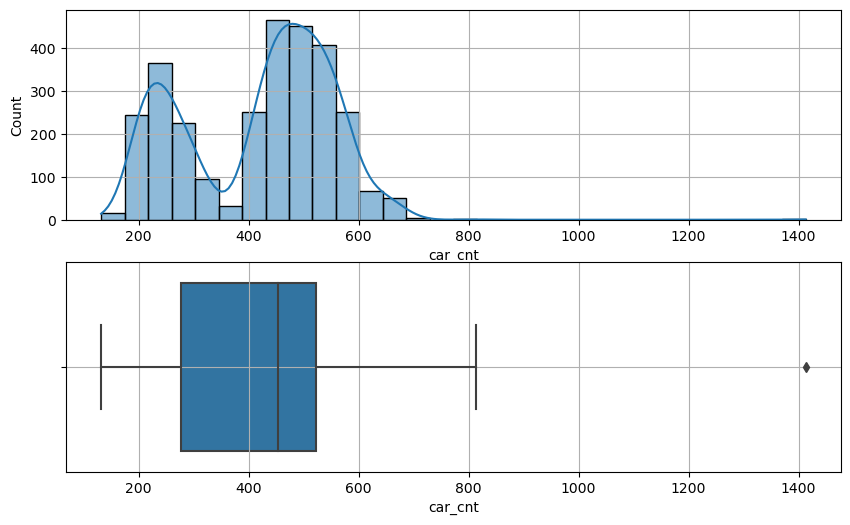

In [166]:
data = df
var = 'car_cnt'
eda_1_num(data, var, bins = 30)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
request_cnt,2923.0,3924.83818,1510.056733,527.0,2161.0,4720.0,5110.0,6182.0


<< 그래프 >>


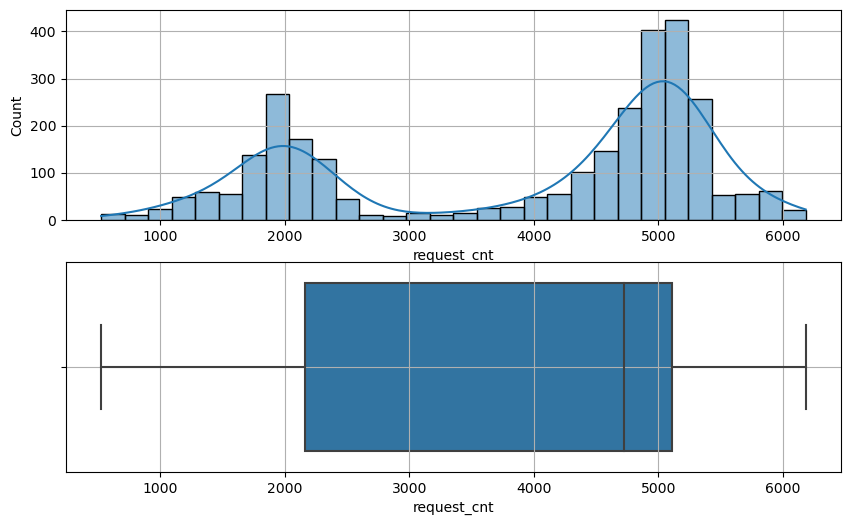

In [167]:
data = df
var = 'request_cnt'
eda_1_num(data, var, bins = 30)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
ride_cnt,2923.0,3283.234348,1249.463168,462.0,1778.5,3932.0,4241.0,5189.0


<< 그래프 >>


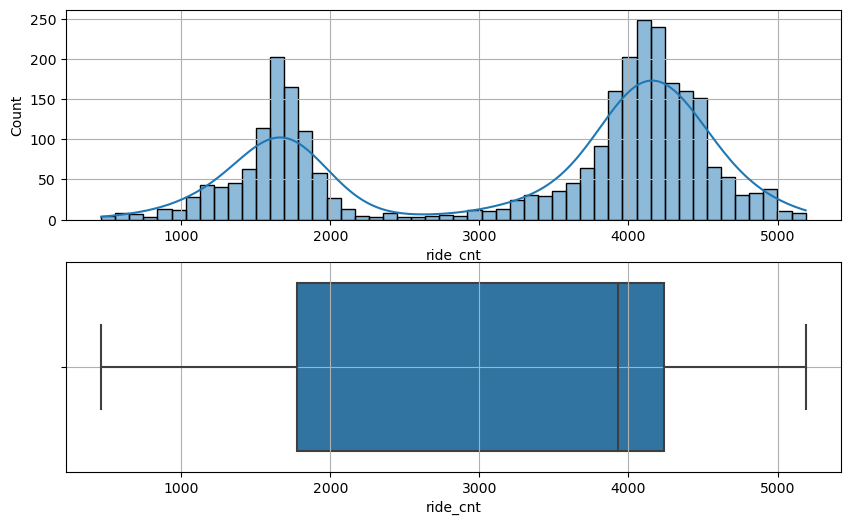

In [168]:
data = df
var = 'ride_cnt'
eda_1_num(data, var, bins = 50)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
waiting_time,2923.0,40.300171,14.099285,17.2,29.6,38.2,48.6,96.1


<< 그래프 >>


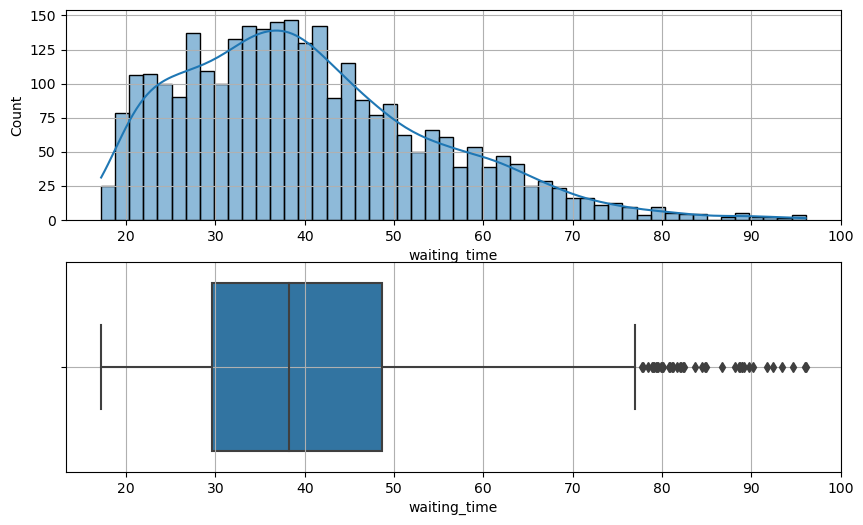

In [169]:
data = df
var = 'waiting_time'
eda_1_num(data, var, bins = 50)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
fare,2923.0,2304.362299,107.351769,2131.0,2228.0,2257.0,2401.0,2733.0


<< 그래프 >>


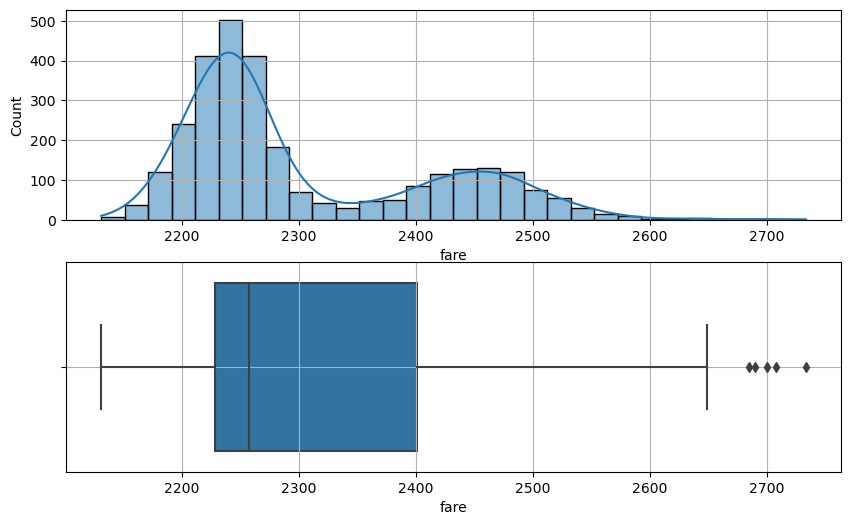

In [170]:
data = df
var = 'fare'
eda_1_num(data, var, bins = 30)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
distance,2923.0,9254.353062,1020.066902,7672.0,8521.0,8822.0,10154.0,14136.0


<< 그래프 >>


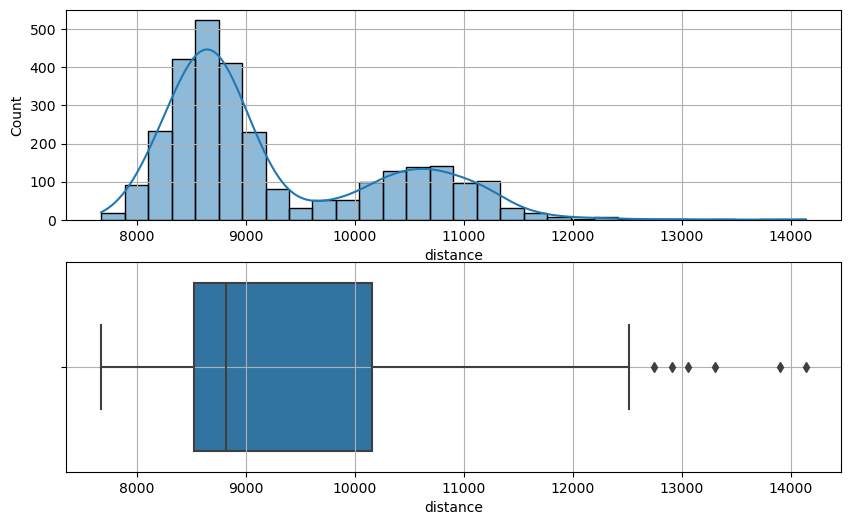

In [171]:
data = df
var = 'distance'
eda_1_num(data, var, bins = 30)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
ride_rate,2923.0,84.156482,5.216705,59.699625,80.596425,84.55711,87.771823,96.884422


<< 그래프 >>


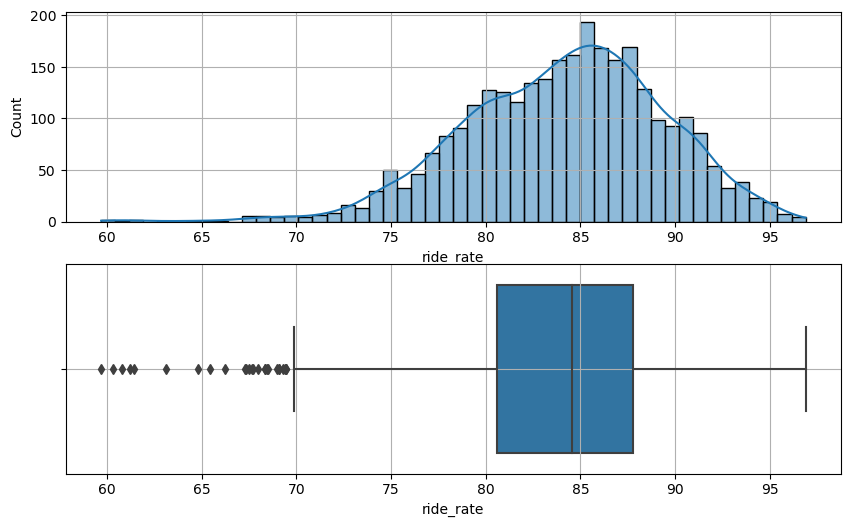

In [172]:
data = df
var = 'ride_rate'
eda_1_num(data, var, bins = 50)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
temp_max,2923.0,18.071502,10.71141,-11.2,9.0,19.7,27.4,39.4


<< 그래프 >>


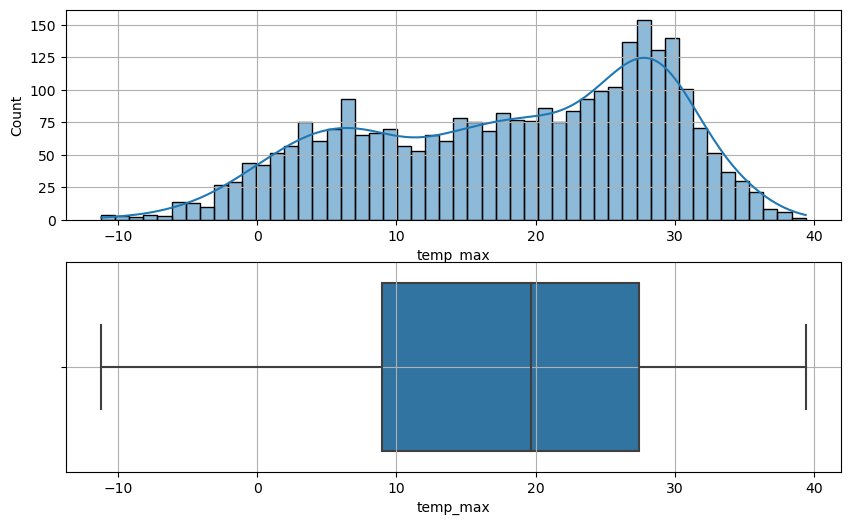

In [173]:
data = df
var = 'temp_max'
eda_1_num(data, var, bins = 50)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
temp_min,2923.0,9.409408,10.787067,-18.5,0.5,10.0,18.9,30.4


<< 그래프 >>


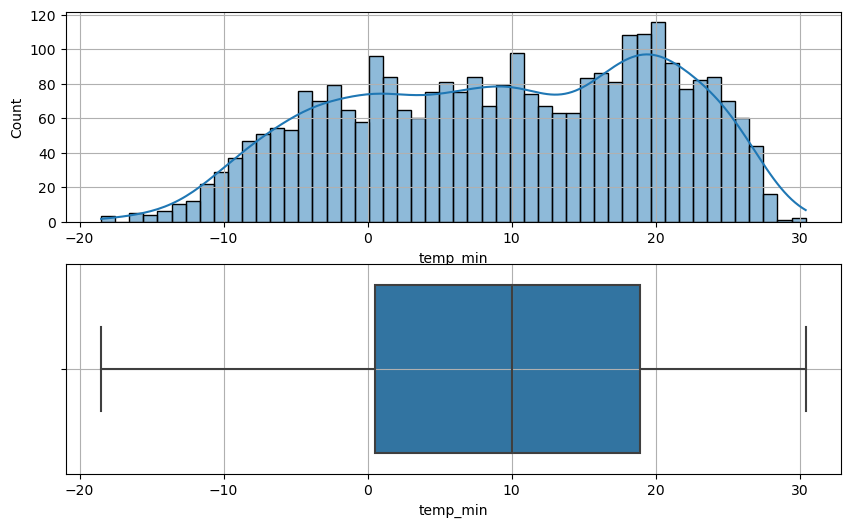

In [174]:
data = df
var = 'temp_min'
eda_1_num(data, var, bins = 50)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
rain(mm),2923.0,3.354465,12.593801,0.0,0.0,0.0,0.3,178.9


<< 그래프 >>


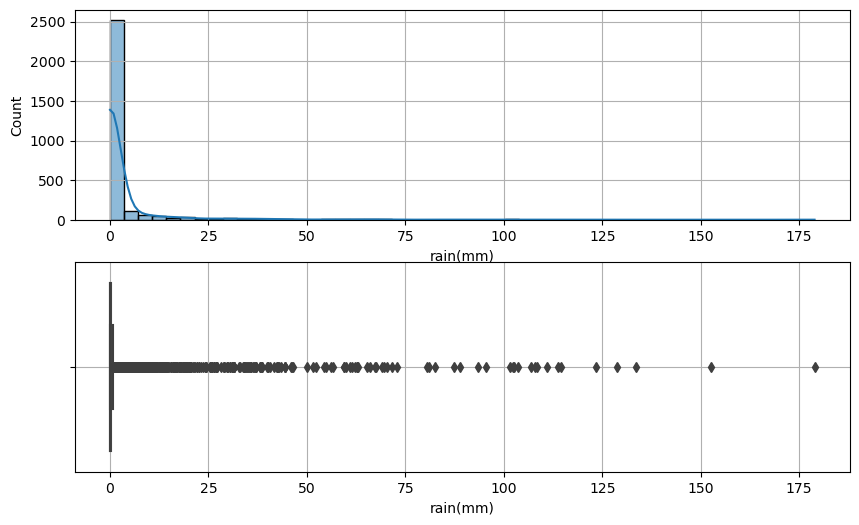

In [175]:
data = df
var = 'rain(mm)'
eda_1_num(data, var, bins = 50)

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
sunshine(MJ/m2),2923.0,13.494266,6.939983,0.0,8.235,12.66,18.58,30.79


<< 그래프 >>


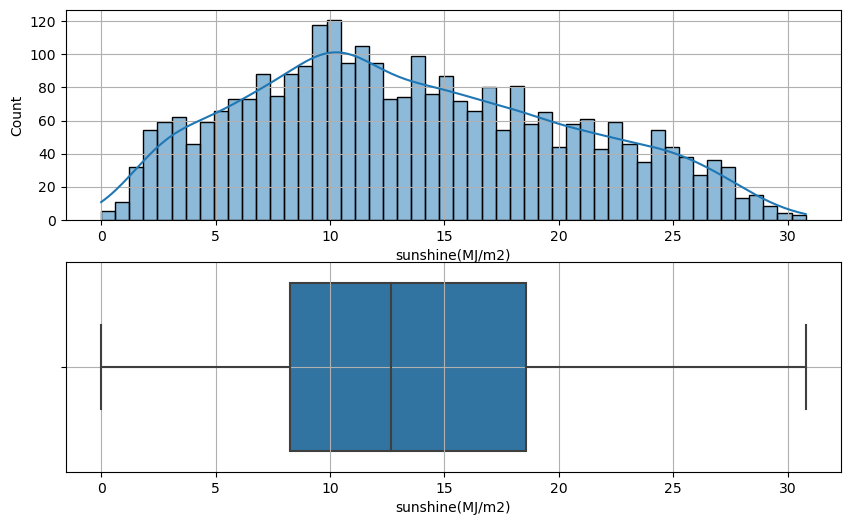

In [176]:
data = df
var = 'sunshine(MJ/m2)'
eda_1_num(data, var, bins = 50)

In [177]:
df.head(2)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday,yesterday_waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Season,HolidayName,rolling_mean,ride_rate,distance_category
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79,Winter,1.0,22.775,90.322581,10000-11000
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07,Winter,0.0,23.460,89.898670,8000-9000


### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

,count,ratio
0.0,2803,0.958946
1.0,120,0.041054


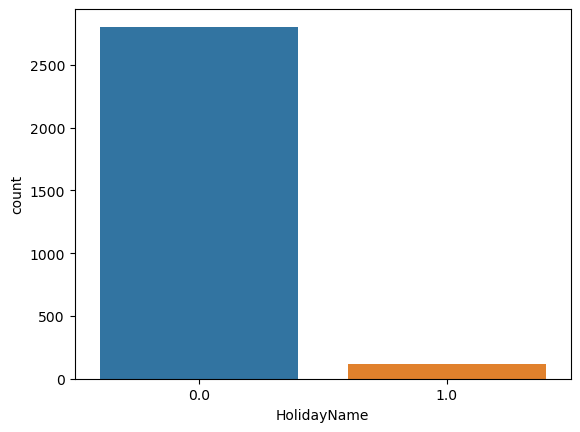

In [178]:
# 범주형 변수 분석
data = df
var = 'HolidayName'

eda_1_cat(data, var)

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 산점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_27132\2499613819.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


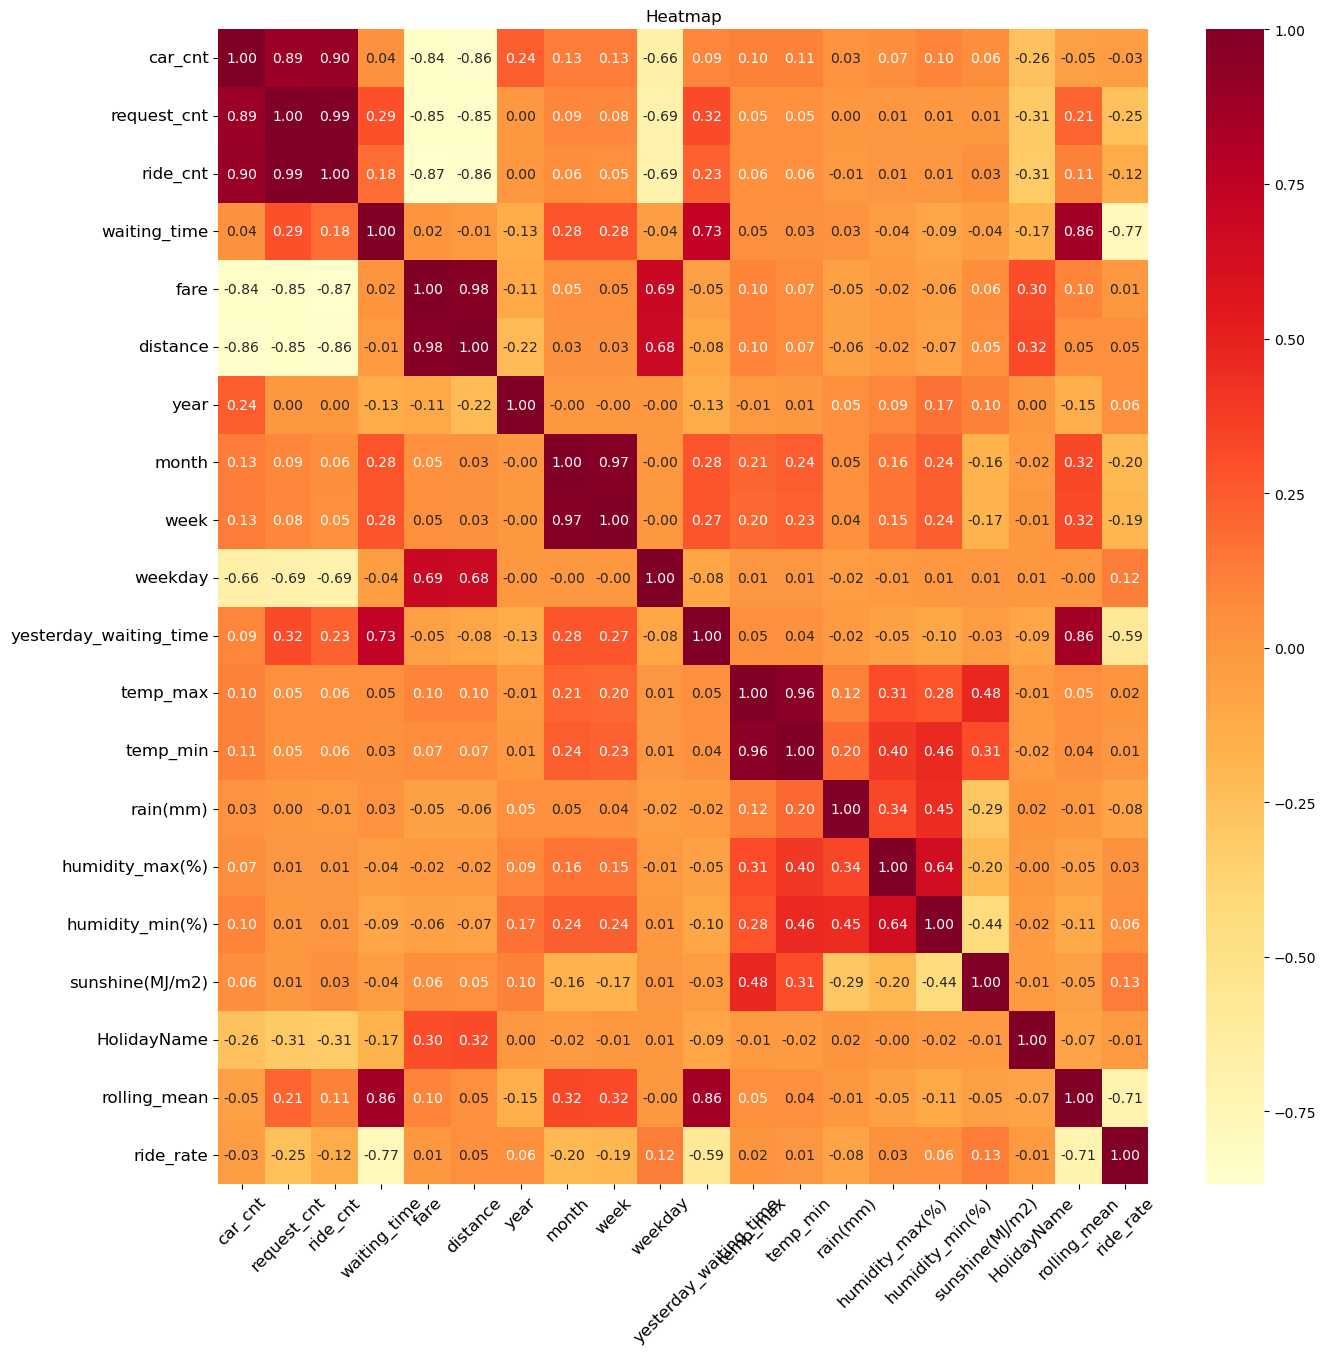

In [179]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True, 
            cmap='YlOrRd', 
            fmt='.2f'
            )
plt.title('Heatmap')
plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

#### 2) 산점도

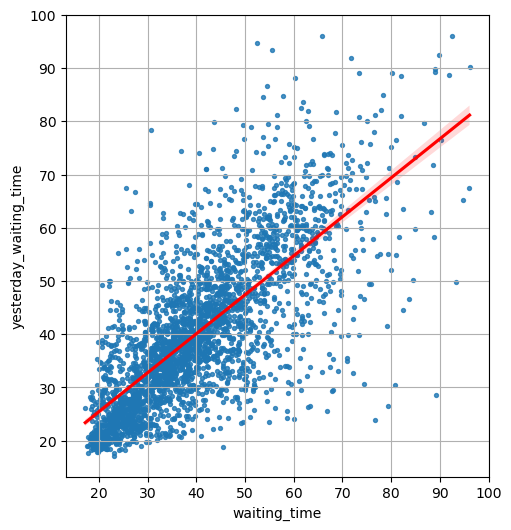

PearsonRResult(statistic=0.7324359092678011, pvalue=0.0)


In [192]:
target = 'yesterday_waiting_time'
var = 'waiting_time'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.regplot(x=var, y = target, data = data, scatter_kws={'s': 8}, line_kws={'color': 'red'})
plt.grid()
plt.show()
print(spst.pearsonr(data[var], data[target]))

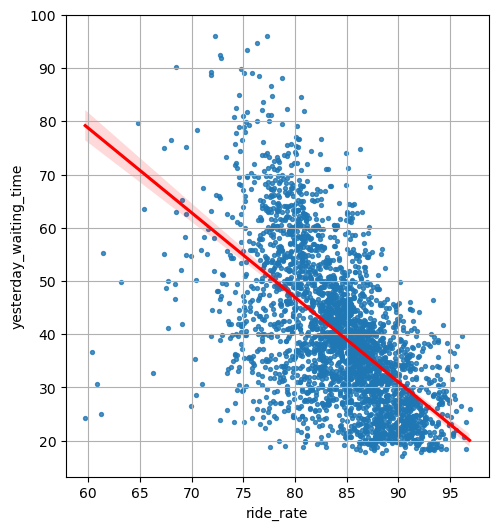

PearsonRResult(statistic=-0.5883221827332603, pvalue=8.535881197459163e-272)


In [182]:
target = 'waiting_time'
var = 'ride_rate'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.regplot(x=var, y = target, data = data, scatter_kws={'s': 8}, line_kws={'color': 'red'})
plt.grid()
plt.show()
print(spst.pearsonr(data[var], data[target]))

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

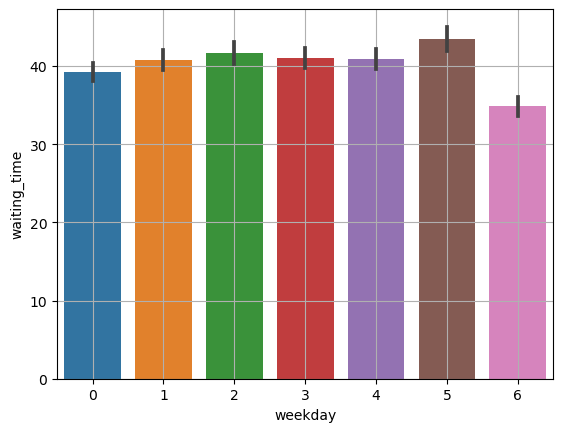

In [183]:
sns.barplot(x = 'weekday', y='waiting_time', data = df)
plt.grid()
plt.show()

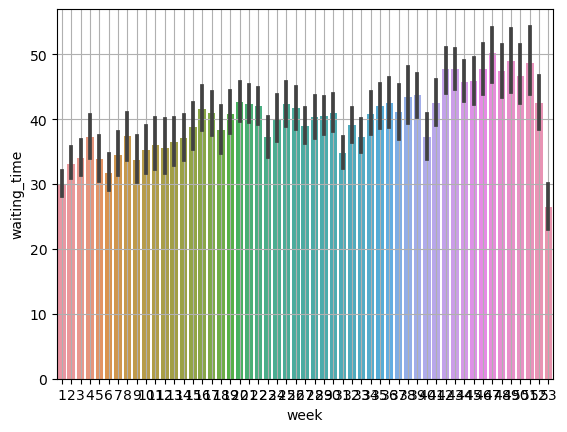

In [193]:
sns.barplot(x = 'week', y='waiting_time', data = df)
plt.grid()
plt.show()

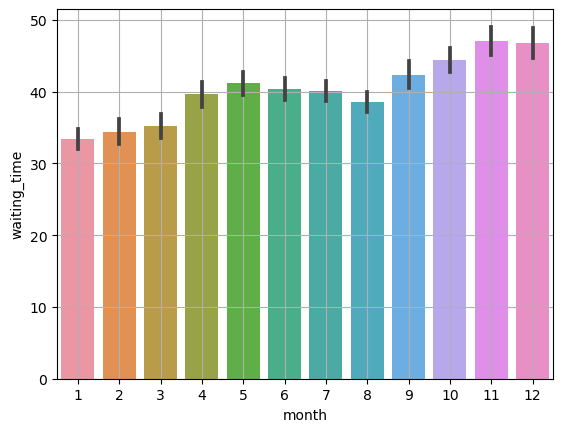

In [184]:
sns.barplot(x = 'month', y='waiting_time', data = df)
plt.grid()
plt.show()

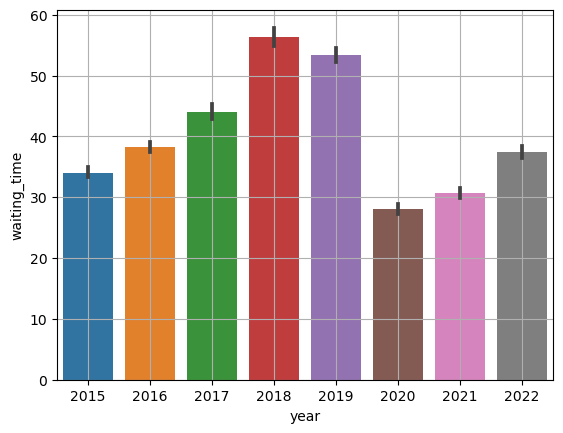

In [185]:
sns.barplot(x = 'year', y='waiting_time', data = df)
plt.grid()
plt.show()

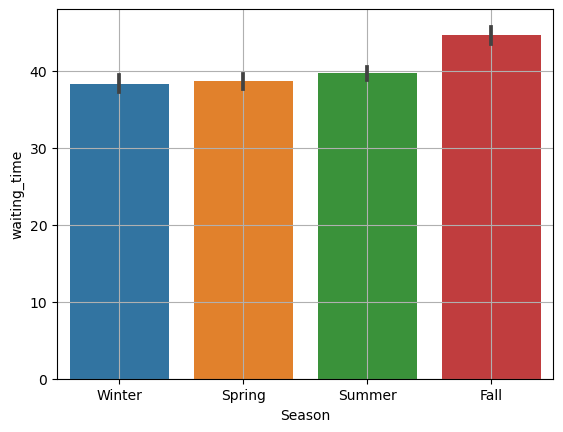

In [187]:
sns.barplot(x = 'Season', y='waiting_time', data = df)
plt.grid()
plt.show()

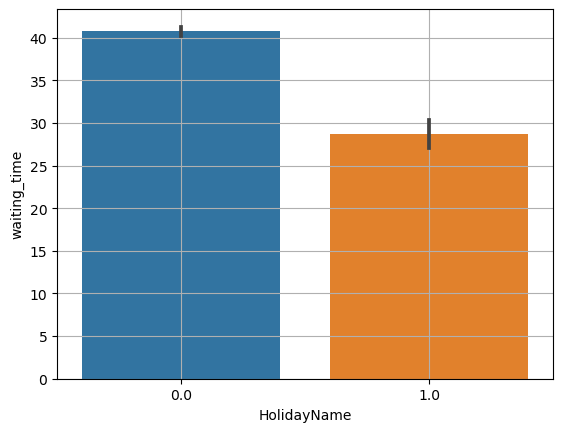

In [188]:
sns.barplot(x = 'HolidayName', y='waiting_time', data = df)
plt.grid()
plt.show()

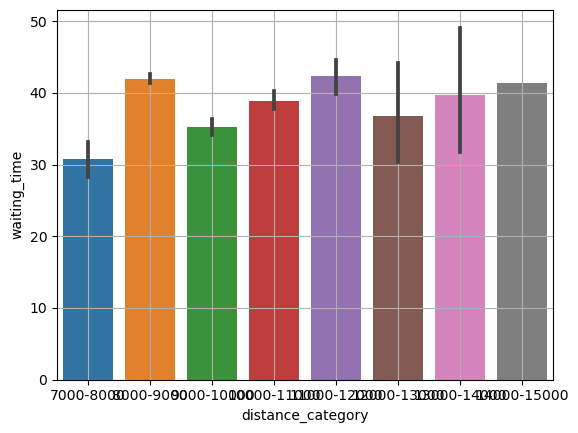

In [190]:
sns.barplot(x = 'distance_category', y='waiting_time', data = df)
plt.grid()
plt.show()

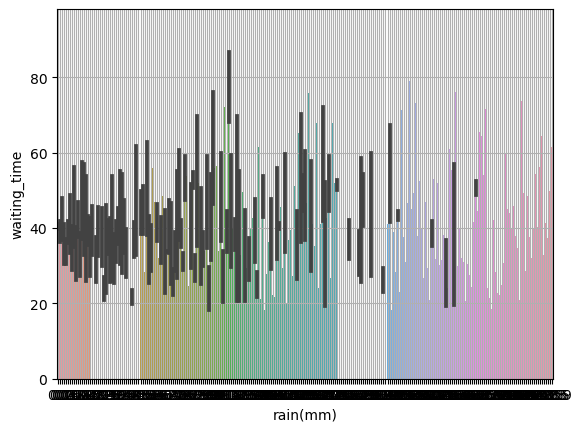

In [191]:
sns.barplot(x = 'rain(mm)', y='waiting_time', data = df)
plt.grid()
plt.show()

In [203]:
# 그룹별 저장
P_1= df.loc[df.month == 1, 'waiting_time']
P_2= df.loc[df.month == 2, 'waiting_time']
P_3= df.loc[df.month == 3, 'waiting_time']
P_4= df.loc[df.month == 4, 'waiting_time']
P_5= df.loc[df.month == 5, 'waiting_time']
P_6= df.loc[df.month == 6, 'waiting_time']
P_7= df.loc[df.month == 7, 'waiting_time']
P_8= df.loc[df.month == 8, 'waiting_time']
P_9= df.loc[df.month == 9, 'waiting_time']
P_10= df.loc[df.month == 10, 'waiting_time']
P_11= df.loc[df.month == 11, 'waiting_time']
P_12= df.loc[df.month == 12, 'waiting_time']

# 2) 분산분석
spst.f_oneway(P_1, P_2, P_3, P_4, P_5, P_6,P_7,P_8,P_9,P_10,P_11,P_12)

F_onewayResult(statistic=26.894509535179676, pvalue=4.921705948368874e-54)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [206]:
print('ride_rate: ',spst.pearsonr(df['waiting_time'], df['ride_rate']))

ride_rate:  PearsonRResult(statistic=-0.7698995001653992, pvalue=0.0)


* 중간(약한) 관계의 변수

In [205]:
print('request_cnt: ',spst.pearsonr(df['waiting_time'], df['request_cnt']))
print('ride_cnt: ',spst.pearsonr(df['waiting_time'], df['ride_cnt']))
print('month: ',spst.f_oneway(P_1, P_2, P_3, P_4, P_5, P_6,P_7,P_8,P_9,P_10,P_11,P_12))


request_cnt:  PearsonRResult(statistic=0.2922970150283053, pvalue=1.1320389742120819e-58)
ride_cnt:  PearsonRResult(statistic=0.18482770066961993, pvalue=7.103181302682093e-24)
month:  F_onewayResult(statistic=26.894509535179676, pvalue=4.921705948368874e-54)


* (거의) 관계가 없는 변수

In [195]:
'Date', 'car_cnt', 'waiting_time', 'fare', 'distance', 'year', 'weekday', 'yesterday_waiting_time',
'temp_max', 'temp_min', 'rain(mm)','humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 
'Season', 'HolidayName', 'rolling_mean', 'distance_category'

('humidity_max(%)',
 'humidity_min(%)',
 'sunshine(MJ/m2)',
 'Season',
 'HolidayName',
 'rolling_mean',
 'distance_category')

In [196]:
df.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'year', 'month', 'week', 'weekday',
       'yesterday_waiting_time', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'Season',
       'HolidayName', 'rolling_mean', 'ride_rate', 'distance_category'],
      dtype='object')

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl